In [14]:
import pandas as pd
df = pd.read_csv("../archive/Annual_Macroeconomic_Factors.csv", encoding="windows-1252")
df_new = df.drop(columns=["Date"])

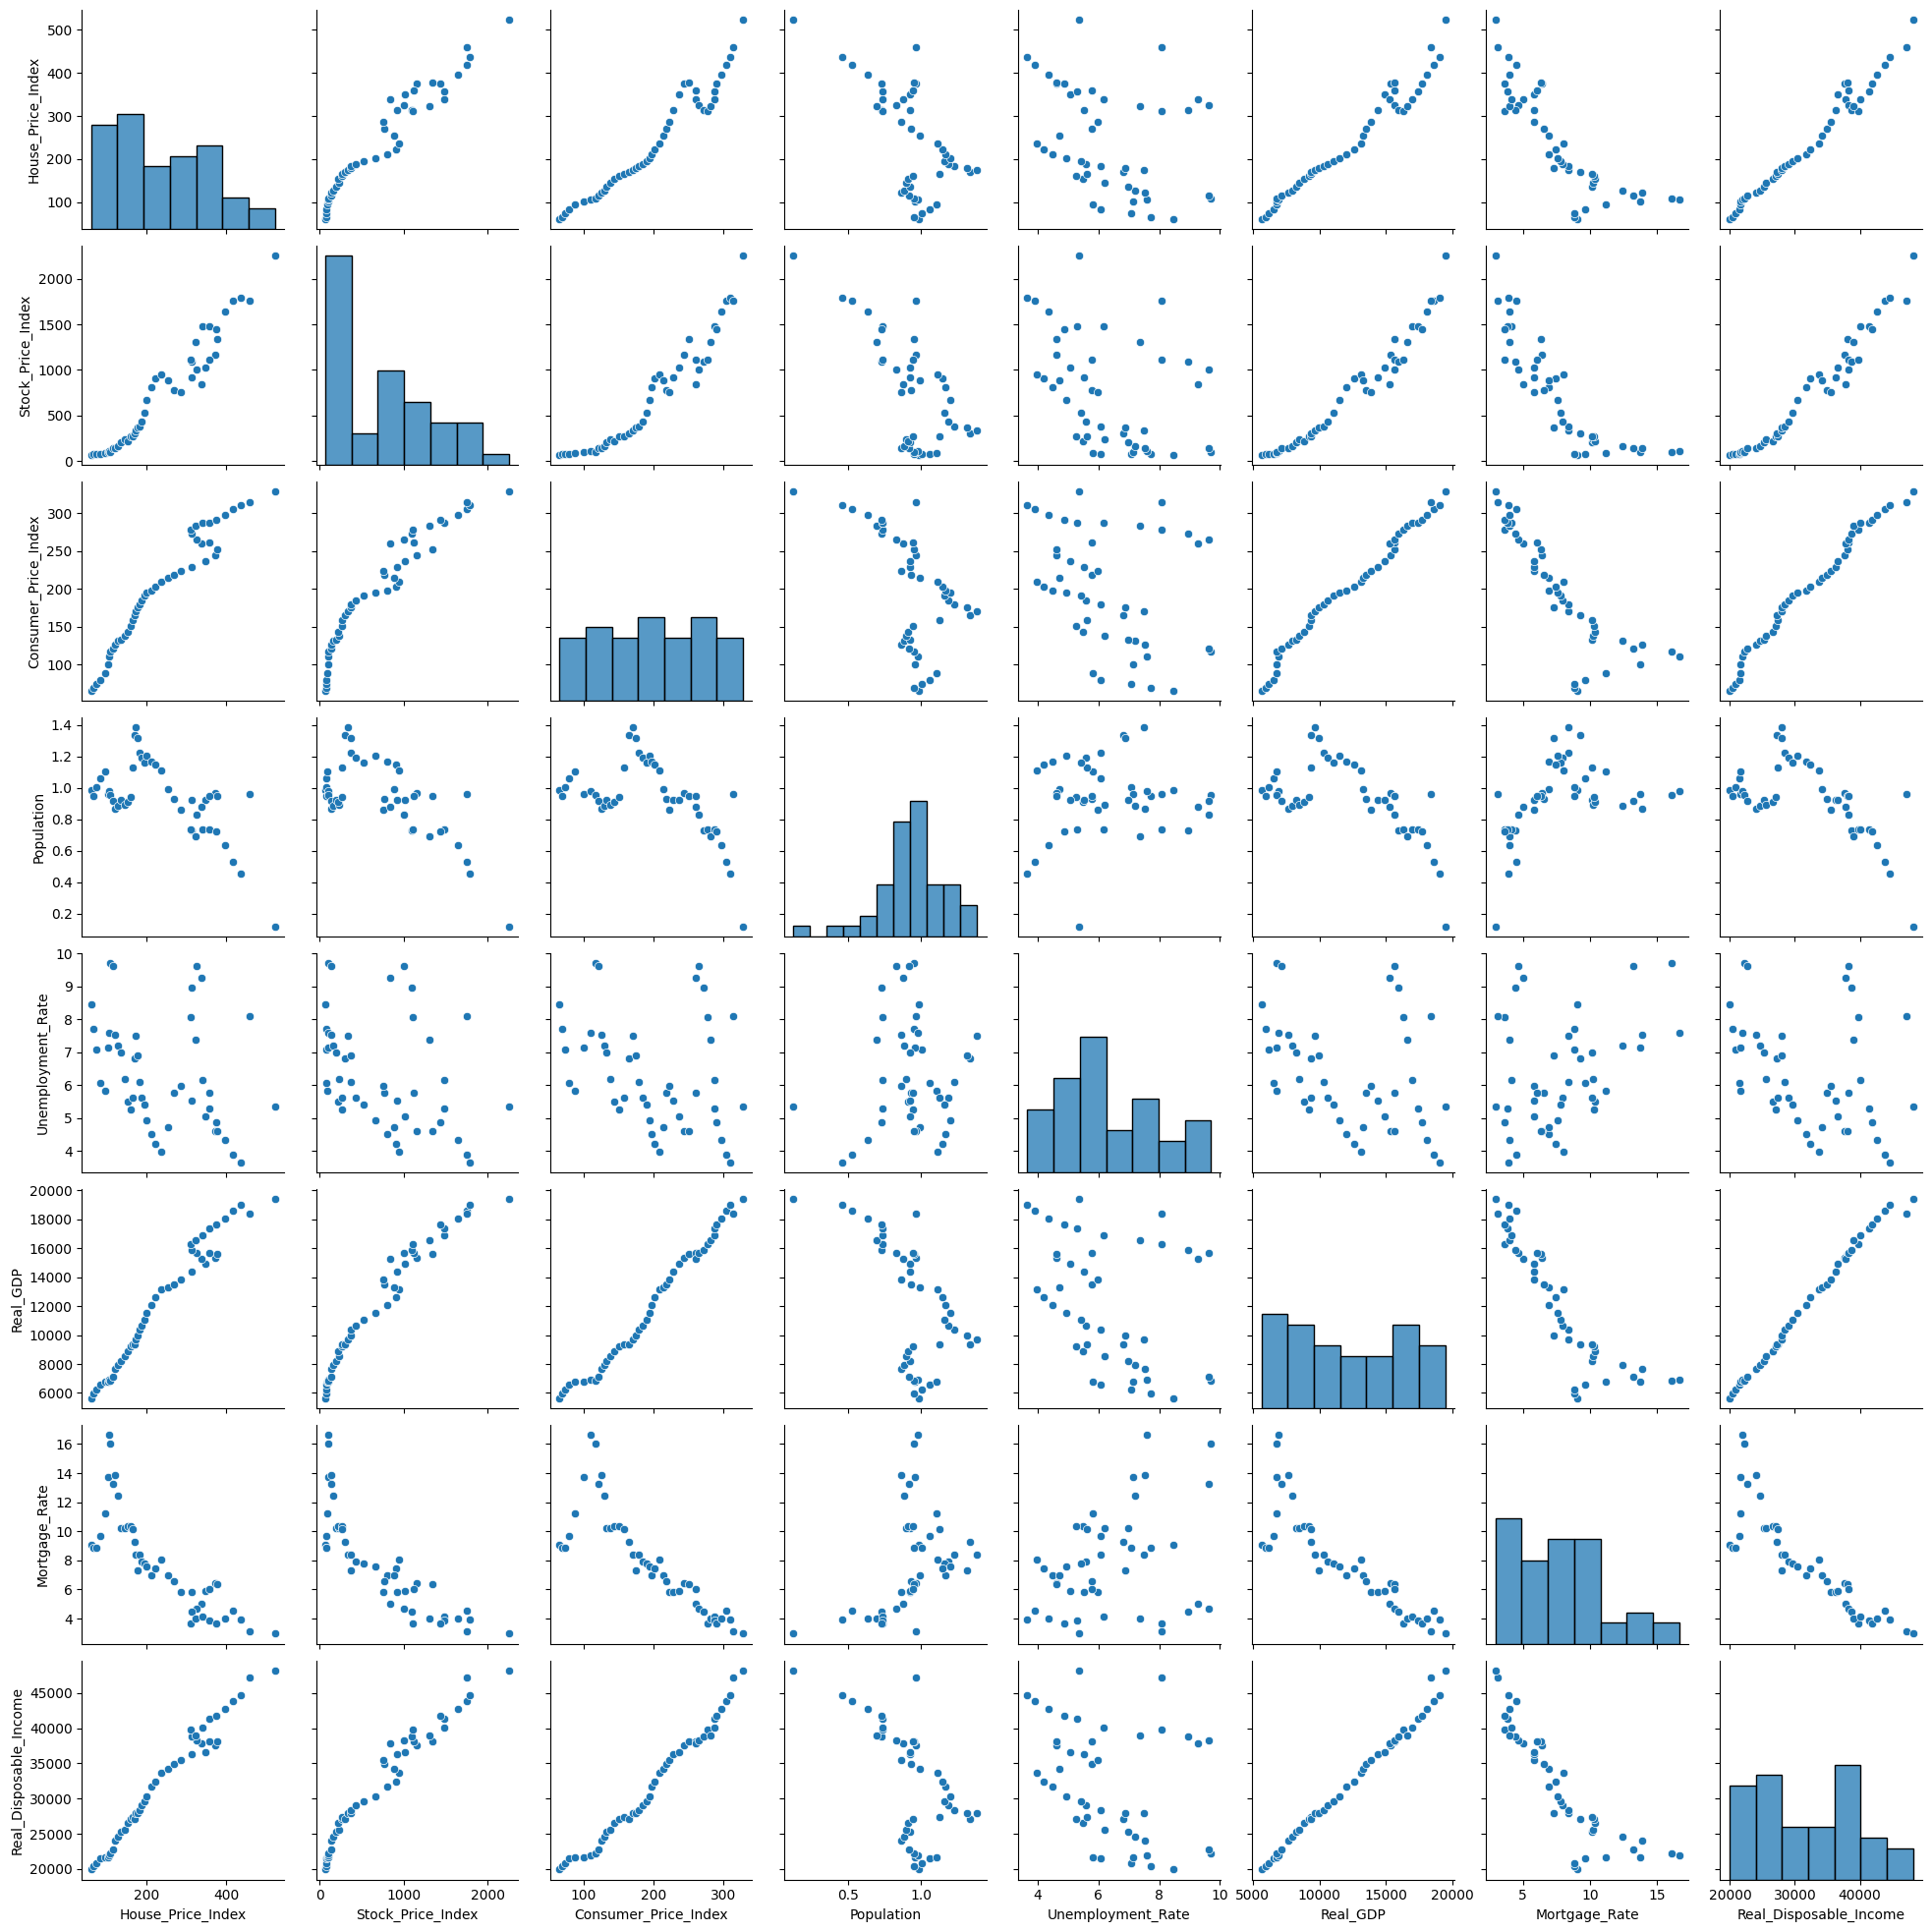

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_new)
plt.show()

In [17]:
df.fillna(df_new.mean(), inplace = True)

In [19]:
from sklearn.model_selection import train_test_split

X = df_new.drop('House_Price_Index', axis = 1)
Y = df_new['House_Price_Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 652.2592040354266
RMSE: 25.539365771988674
R-squared: 0.9196681353244593


In [24]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 451.99568328525146
RMSE: 21.26019010463574
R-squared: 0.9443324742081719
